In [1]:
import pandas as pd
import numpy
import sklearn
import scipy
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import pdist, squareform
from math import radians, cos, sin, asin, sqrt 
from scipy.cluster.vq import whiten
from scipy.cluster.vq import *  
import matplotlib
import matplotlib.pyplot as pltpython

In [2]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [3]:
import pandas as pd
import numpy as np

def coordinate(ls):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    ls[0] = ls[0] * (k * np.pi/180.0)
    ls[1] = np.log(np.tan((90 + ls[1]) * np.pi/360.0)) * k
    return ls

upperleft =[116.0, 40.4]
bottomright = [117.0, 39.6]

upperleft = coordinate(upperleft)
bottomright = coordinate(bottomright)
print upperleft
print bottomright

[12913060.932019735, 4924240.5872051958]
[13024380.42281301, 4807984.4931904972]


In [4]:
from bokeh.plotting import figure
from bokeh.tile_providers import WMTSTileSource

China = x_range,y_range = ((upperleft[0],bottomright[0]), (bottomright[1],upperleft[1]))
fig = figure(tools='pan, wheel_zoom,hover', x_range=x_range, y_range=y_range, width = 950, height = 580)
fig.axis.visible = True

In [5]:
url = 'http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'
attribution = ""
fig.add_tile(WMTSTileSource(url=url, attribution=attribution))

TileRenderer(id='787dae56-0bb7-431e-a266-84f0772a950a', ...)

In [6]:
fr3 = open('/data/locus/data_feature_0_1_3.csv','r')
user_id = []
latitude = []
longitude = []
for line in fr3.readlines():
    item = [k.strip() for k in line.split(',')]
    if float(item[1])>39.820 and float(item[1])<40.001 and float(item[2])>116.238 and float(item[2])< 116.513: #判断五环数据
        user_id.append(int(item[0]))
        latitude.append(float(item[1]))
        longitude.append(float(item[2]))

In [7]:
lati = latitude
longi = longitude
X = pd.DataFrame ({"lat":lati,"lng":longi})
xy=numpy.array(X) 

In [8]:
print xy

[[  39.912  116.401]
 [  39.955  116.355]
 [  39.915  116.281]
 ..., 
 [  39.986  116.453]
 [  39.951  116.363]
 [  39.879  116.364]]


In [9]:
res, idx = kmeans2(xy, 6, iter=40, minit='points')  #输入：xy必须是个数组，6指的是聚类数，可改，iter是迭代次数， 输出：res 放的是经纬度，idx存的数表示原来的点在哪一类中

In [10]:
print res  #res出来的是纬度和经度

[[  39.86752017  116.36884232]
 [  39.94986938  116.46454427]
 [  39.86801693  116.45779055]
 [  39.95936793  116.37951308]
 [  39.94618916  116.29825369]
 [  39.86239919  116.28752413]]


In [11]:
print idx  #idx存的数表示原来的点在哪一类中

[3 3 4 ..., 1 3 0]


In [12]:
import pandas as pd
import numpy as np
"""plot blue area"""#画出来的是原来的k-means聚类效果
def wgs84_to_web_mercator(df, lon="lon", lat="lat"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df
lon = []
lat = []
lon1 = []
lat1 = []
lon2 = []
lat2 = []
lon3 = []
lat3 = []
lon4 = []
lat4 = []
lon5 = []
lat5 = []
numSamples, dim = X.shape
for i in xrange(numSamples):  
    markIndex = idx[i]
    x=float(X.values[i][1])
    y=float(X.values[i][0])
    if markIndex == 0 :
        lon.append(x)
        lat.append(y)
    elif markIndex == 1 :
        lon1.append(x)
        lat1.append(y) 
    elif markIndex == 2 :
        lon2.append(x)
        lat2.append(y)
    elif markIndex == 3 :
        lon3.append(x)
        lat3.append(y)
    elif markIndex == 4 :
        lon4.append(x)
        lat4.append(y)
    else :
        lon5.append(x)
        lat5.append(y)
        
df = pd.DataFrame(dict(lon=lon,lat=lat))    
wgs84_to_web_mercator(df)
df1 = pd.DataFrame(dict(lon=lon1,lat=lat1))    
wgs84_to_web_mercator(df1)
df2 = pd.DataFrame(dict(lon=lon2,lat=lat2))    
wgs84_to_web_mercator(df2)
df3 = pd.DataFrame(dict(lon=lon3,lat=lat3))    
wgs84_to_web_mercator(df3)
df4 = pd.DataFrame(dict(lon=lon4,lat=lat4))    
wgs84_to_web_mercator(df4)
df5 = pd.DataFrame(dict(lon=lon5,lat=lat5))    
wgs84_to_web_mercator(df5)

,lat,lon,x,y
0,39.851,116.322,1.294891e+07,4.844314e+06
1,39.873,116.280,1.294423e+07,4.847504e+06
2,39.846,116.287,1.294501e+07,4.843589e+06
3,39.896,116.322,1.294891e+07,4.850841e+06
4,39.878,116.265,1.294256e+07,4.848229e+06
5,39.834,116.322,1.294891e+07,4.841849e+06
6,39.904,116.276,1.294379e+07,4.852002e+06
7,39.892,116.257,1.294167e+07,4.850260e+06
8,39.859,116.313,1.294790e+07,4.845474e+06
9,39.843,116.320,1.294868e+07,4.843154e+06


In [13]:
fig.circle(x=df['x'], y=df['y'],fill_color='blue', size=5)
fig.circle(x=df1['x'], y=df1['y'],fill_color='red', size=5)
fig.circle(x=df2['x'], y=df2['y'],fill_color='black', size=5)
fig.circle(x=df3['x'], y=df3['y'],fill_color='white', size=5)
fig.circle(x=df4['x'], y=df4['y'],fill_color='yellow', size=5)
fig.circle(x=df5['x'], y=df5['y'],fill_color='purple', size=5)
show(fig)

In [56]:
numSamples, dim = X.shape
rest_dict = {}
for i in xrange(numSamples):
    if user_id[i] not in rest_dict:
        rest_dict[user_id[i]]=[X.values[i][1],X.values[i][0],idx[i]]
other_dict = {}
fr4 = open('/data/locus/data_feature_0_1_3_1.csv','r')
for line in fr4.readlines():
    item = [k.strip() for k in line.split(',')]
    if int(item[0]) not in other_dict:
        other_dict[int(item[0])] =[float(item[2]),float(item[1])]

In [57]:
for (key_1 ,value_1) in other_dict.items() :
    if key_1 in rest_dict.keys():
        value_1.append(rest_dict[key_1][2])
    else :
        value_1.append(7)

In [16]:
'''print(other_dict[4])'''

'print(other_dict[4])'

In [61]:
import pandas as pd
import numpy as np
"""plot blue area"""#画出来的是原来的k-means聚类效果
def wgs84_to_web_mercator(df, lon="lon", lat="lat"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df
other_lon = []
other_lat = []
other_lon1 = []
other_lat1 = []
other_lon2 = []
other_lat2 = []
other_lon3 = []
other_lat3 = []
other_lon4 = []
other_lat4 = []
other_lon5 = []
other_lat5 = []
cnt= 0
for (key_1,value_1) in other_dict.items():  
    markIndex = int(other_dict[key_1][2])
    x=float(other_dict[key_1][0])
    y=float(other_dict[key_1][1])
    if markIndex == 0 :
        other_lon.append(x)
        other_lat.append(y)
    elif markIndex == 1 :
        other_lon1.append(x)
        other_lat1.append(y) 
    elif markIndex == 2 :
        other_lon2.append(x)
        other_lat2.append(y)
    elif markIndex == 3 :
        other_lon3.append(x)
        other_lat3.append(y)
    elif markIndex == 4 :
        other_lon4.append(x)
        other_lat4.append(y)
    elif markIndex == 5:
        other_lon5.append(x)
        other_lat5.append(y)
    else :
        cnt =cnt + 1
        
other_df = pd.DataFrame(dict(lon=other_lon,lat=other_lat))    
wgs84_to_web_mercator(other_df)
other_df1 = pd.DataFrame(dict(lon=other_lon1,lat=other_lat1))    
wgs84_to_web_mercator(other_df1)
other_df2 = pd.DataFrame(dict(lon=other_lon2,lat=other_lat2))    
wgs84_to_web_mercator(other_df2)
other_df3 = pd.DataFrame(dict(lon=other_lon3,lat=other_lat3))    
wgs84_to_web_mercator(other_df3)
other_df4 = pd.DataFrame(dict(lon=other_lon4,lat=other_lat4))    
wgs84_to_web_mercator(other_df4)
other_df5 = pd.DataFrame(dict(lon=other_lon5,lat=other_lat5))    
wgs84_to_web_mercator(other_df5)

,lat,lon,x,y
0,39.788,116.093,1.292341e+07,4.835183e+06
1,39.890,116.262,1.294223e+07,4.849970e+06
2,39.887,116.322,1.294891e+07,4.849535e+06
3,39.900,116.372,1.295447e+07,4.851421e+06
4,39.859,116.258,1.294178e+07,4.845474e+06
5,39.887,116.285,1.294479e+07,4.849535e+06
6,39.843,116.321,1.294879e+07,4.843154e+06
7,39.828,116.324,1.294913e+07,4.840979e+06
8,39.847,116.288,1.294512e+07,4.843734e+06
9,39.867,116.268,1.294289e+07,4.846634e+06


In [66]:
from bokeh.plotting import figure
from bokeh.tile_providers import WMTSTileSource

China = x_range,y_range = ((upperleft[0],bottomright[0]), (bottomright[1],upperleft[1]))
fig0 = figure(tools='pan, wheel_zoom,hover', x_range=x_range, y_range=y_range, width = 950, height = 580)
fig0.axis.visible = True
url = 'http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'
attribution = ""
fig0.add_tile(WMTSTileSource(url=url, attribution=attribution))
fig0.circle(x=other_df['x'], y=other_df['y'],fill_color='blue',line_alpha=0.3, size=5)
show(fig0)

In [67]:
from bokeh.plotting import figure
from bokeh.tile_providers import WMTSTileSource

China = x_range,y_range = ((upperleft[0],bottomright[0]), (bottomright[1],upperleft[1]))
fig1= figure(tools='pan, wheel_zoom,hover', x_range=x_range, y_range=y_range, width = 950, height = 580)
fig1.axis.visible = True
url = 'http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'
attribution = ""
fig1.add_tile(WMTSTileSource(url=url, attribution=attribution))
fig1.circle(x=other_df1['x'], y=other_df1['y'],fill_color='red',line_alpha=0.2,size=5)
show(fig1)

In [20]:
from bokeh.plotting import figure
from bokeh.tile_providers import WMTSTileSource

China = x_range,y_range = ((upperleft[0],bottomright[0]), (bottomright[1],upperleft[1]))
fig2 = figure(tools='pan, wheel_zoom,hover', x_range=x_range, y_range=y_range, width = 950, height = 580)
fig2.axis.visible = True
url = 'http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'
attribution = ""
fig2.add_tile(WMTSTileSource(url=url, attribution=attribution))
fig2.circle(x=other_df2['x'], y=other_df2['y'],fill_color='black',line_alpha=0.2, size=5)
show(fig2)

In [21]:
from bokeh.plotting import figure
from bokeh.tile_providers import WMTSTileSource

China = x_range,y_range = ((upperleft[0],bottomright[0]), (bottomright[1],upperleft[1]))
fig3 = figure(tools='pan, wheel_zoom,hover', x_range=x_range, y_range=y_range, width = 950, height = 580)
fig3.axis.visible = True
url = 'http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'
attribution = ""
fig3.add_tile(WMTSTileSource(url=url, attribution=attribution))
fig3.circle(x=other_df3['x'], y=other_df3['y'],fill_color='white', size=5)
show(fig3)

In [22]:
from bokeh.plotting import figure
from bokeh.tile_providers import WMTSTileSource

China = x_range,y_range = ((upperleft[0],bottomright[0]), (bottomright[1],upperleft[1]))
fig4 = figure(tools='pan, wheel_zoom,hover', x_range=x_range, y_range=y_range, width = 950, height = 580)
fig4.axis.visible = True
url = 'http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'
attribution = ""
fig4.add_tile(WMTSTileSource(url=url, attribution=attribution))
fig4.circle(x=other_df4['x'], y=other_df4['y'],fill_color='yellow',line_alpha=0.4,  size=5)
show(fig4)

In [23]:
from bokeh.plotting import figure
from bokeh.tile_providers import WMTSTileSource

China = x_range,y_range = ((upperleft[0],bottomright[0]), (bottomright[1],upperleft[1]))
fig5 = figure(tools='pan, wheel_zoom,hover', x_range=x_range, y_range=y_range, width = 950, height = 580)
fig5.axis.visible = True
url = 'http://c.tile.openstreetmap.org/{Z}/{X}/{Y}.png'
attribution = ""
fig5.add_tile(WMTSTileSource(url=url, attribution=attribution))
fig5.circle(x=other_df5['x'], y=other_df5['y'],fill_color='purple',line_alpha=0.3,size=5)
show(fig5)

In [41]:
def haversine(lon1,lat1, lon2,lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [80]:
dis0=[]
for i in range(len(lon1)):
    x=float(lon1[i])
    y=float(lat1[i])
    x1=float(res[1][1])
    y1=float(res[1][0])
    z= haversine(lon1=x,lat1=y,lon2=x1,lat2=y1)
    dis0.append(z)


In [83]:
dis1=[]
for i in range(len(other_lon1)):
    x=float(other_lon1[i])
    y=float(other_lat1[i])
    x1=float(res[1][1])
    y1=float(res[1][0])
    z= haversine(lon1=x,lat1=y,lon2=x1,lat2=y1)
    if z<7 :
        dis1.append(z)

In [81]:
area_dis1=sum(dis0)/len(dis0)
print area_dis1

3.61556913978


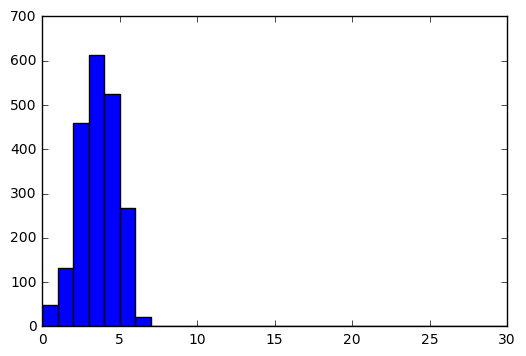

6.83686469212
3.61556913978


In [82]:
x = range(30)
y = [0 for i in range(30)]
for value in dis0:
    if value >= 30:
        value = 29.9
    y[int(value)] += 1

pltpython.bar(x,y, width = 1.0)
pltpython.show()
z=max(dis0)
print z
area_dis1=sum(dis0)/len(dis0)
print area_dis1

In [64]:
area_dis2=sum(dis1)/len(dis1)
print area_dis2

5.5518223387


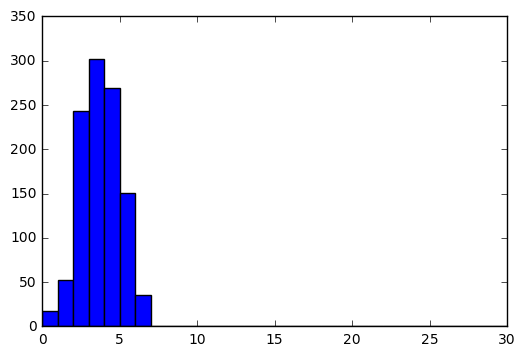

6.96529031435
3.75524862283


In [84]:
x = range(30)
y = [0 for i in range(30)]
for value in dis1:
    if value >= 30:
        value = 29.9
    y[int(value)] += 1

pltpython.bar(x,y, width = 1.0)
pltpython.show()
z=max(dis1)
print z
area_dis2=sum(dis1)/len(dis1)
print area_dis2